In [ ]:
import pandas as pd;
from scipy.stats import zscore
import torch as torch;
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
 
 
uploaded = files.upload()

Saving iris.csv to iris.csv


In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-



import io
np.random.seed(42)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#read in the dataset, convert to numpy
dfData = pd.read_csv(io.BytesIO(uploaded['iris.csv']))

np_x=dfData[list(dfData.columns)[0:-1]].apply(zscore).to_numpy();
np_y = pd.get_dummies(dfData['variety']).to_numpy();

n_classes = 3;
n_features = np_x.shape[1];

x_train=np_x
y_train=np_y

#define pytorch linear binary classifier


# create tensor variables for data, we do not need gradient w.r.t. to them
t_x_train=torch.tensor(x_train,requires_grad=False,device=device);
t_y_train=torch.tensor(y_train,requires_grad=False,device=device);


#define starting value of weights W for gradient descent
init_std_dev = 0.01;
initialW=init_std_dev*np.random.randn(n_features,n_classes)

# create a PyTorch tensor variable for W and b. 
# we will be optimizing over W, b, finding their best value using gradient descent, so we need gradient enabled
W = torch.tensor(initialW,requires_grad=True,device=device);
b = torch.zeros((1,n_classes),requires_grad=True,device=device);

# this optimizer will do gradient descent for us
learning_rate = 0.001;
optimizer = torch.optim.SGD([W,b],lr=learning_rate)
#optimizer = torch.optim.Adam([W,b],lr=learning_rate)

n_epochs = 10000;
for i in range(n_epochs):
    # clear previous gradient calculations
    optimizer.zero_grad();
    
    # calculate model predictions
    linear_predictions = torch.matmul(t_x_train,W)+b
    activations = 1.0 / (1.0 + torch.exp(-linear_predictions));
    
    #calculate loss
    prediction_error = t_y_train-activations
    risk = (torch.mean(torch.pow(prediction_error,2)));

    #calculate gradients of risk w.r.t. W,b and propagate them back
    risk.backward();

    # use the gradient to change W, b
    optimizer.step();

    # calculate accuracy (on the training set!)
    true_class = np.argmax(t_y_train.detach().cpu().numpy(),axis=1)
    pred_class = np.argmax(activations.detach().cpu().numpy(),axis=1)
    accuracy = np.count_nonzero(true_class == pred_class)/pred_class.shape[0];
    error = 1.0 - accuracy;
    
    print(i,risk.item(),accuracy)

Streaming output truncated to the last 5000 lines.
5000 0.16672852898118087 0.82
5001 0.16671983169886023 0.82
5002 0.1667111362065937 0.82
5003 0.16670244266643613 0.82
5004 0.1666937509152165 0.82
5005 0.16668506095238572 0.82
5006 0.1666763729410581 0.82
5007 0.16666768671700566 0.82
5008 0.16665900227967975 0.82
5009 0.16665031995125257 0.82
5010 0.16664163940842425 0.82
5011 0.1666329606506468 0.82
5012 0.1666242836773724 0.82
5013 0.16661560865166186 0.82
5014 0.1666069354093434 0.82
5015 0.16659826394986976 0.82
5016 0.16658959443519283 0.82
5017 0.16658092686235834 0.82
5018 0.16657226107069714 0.82
5019 0.16656359705966267 0.82
5020 0.16655493499226232 0.82
5021 0.16654627470438046 0.82
5022 0.16653761619547128 0.82
5023 0.16652895962743114 0.82
5024 0.16652030483725525 0.82
5025 0.16651165198445098 0.82
5026 0.1665030009084067 0.82
5027 0.16649435177207625 0.82
5028 0.1664857044114003 0.82
5029 0.16647705882583422 0.82
5030 0.16646841517721914 0.82
5031 0.16645977330260836 0.

# New Section

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
risk_list=[]
risk1=[]
risk2=[]
risk3=[]
epochs=range(0,10000)
accuracy_list=[]
a1=[]
a2=[]
a3=[]
#define starting value of weights W for gradient descent
init_std_dev = 0.01;
initialW=init_std_dev*np.random.randn(n_features,n_classes)

# create a PyTorch tensor variable for W and b. 
# we will be optimizing over W, b, finding their best value using gradient descent, so we need gradient enabled
W = torch.tensor(initialW,requires_grad=True,device=device);
b = torch.zeros((1,n_classes),requires_grad=True,device=device);
############################################################################
# this optimizer will do gradient descent for us
learning_rate = 0.001;
optimizer = torch.optim.SGD([W,b],lr=learning_rate)
#optimizer = torch.optim.Adam([W,b],lr=learning_rate)

n_epochs = 10000;
for i in range(n_epochs):
    # clear previous gradient calculations
    optimizer.zero_grad();
    
    # calculate model predictions
    linear_predictions = torch.matmul(t_x_train,W)+b
    activations = 1.0 / (1.0 + torch.exp(-linear_predictions));
    
    #calculate loss
    prediction_error = t_y_train-activations
    risk = (torch.mean(torch.pow(prediction_error,2)));

    #calculate gradients of risk w.r.t. W,b and propagate them back
    risk.backward();

    # use the gradient to change W, b
    optimizer.step();

    # calculate accuracy (on the training set!)
    true_class = np.argmax(t_y_train.detach().cpu().numpy(),axis=1)
    pred_class = np.argmax(activations.detach().cpu().numpy(),axis=1)
    accuracy = np.count_nonzero(true_class == pred_class)/pred_class.shape[0];
    error = 1.0 - accuracy;
    risk1.append(risk.item())
    a1.append(accuracy)

risk_list.append(risk1)
accuracy_list.append(a1)

######################################################################################
W = torch.tensor(initialW,requires_grad=True,device=device);
b = torch.zeros((1,n_classes),requires_grad=True,device=device);
# this optimizer will do gradient descent for us
learning_rate = 0.0001;
optimizer = torch.optim.SGD([W,b],lr=learning_rate)
#optimizer = torch.optim.Adam([W,b],lr=learning_rate)

n_epochs = 10000;
for i in range(n_epochs):
    # clear previous gradient calculations
    optimizer.zero_grad();
    
    # calculate model predictions
    linear_predictions = torch.matmul(t_x_train,W)+b
    activations = 1.0 / (1.0 + torch.exp(-linear_predictions));
    
    #calculate loss
    prediction_error = t_y_train-activations
    risk = (torch.mean(torch.pow(prediction_error,2)));

    #calculate gradients of risk w.r.t. W,b and propagate them back
    risk.backward();

    # use the gradient to change W, b
    optimizer.step();

    # calculate accuracy (on the training set!)
    true_class = np.argmax(t_y_train.detach().cpu().numpy(),axis=1)
    pred_class = np.argmax(activations.detach().cpu().numpy(),axis=1)
    accuracy = np.count_nonzero(true_class == pred_class)/pred_class.shape[0];
    error = 1.0 - accuracy;
    risk2.append(risk.item())
    a2.append(accuracy)

risk_list.append(risk2)
accuracy_list.append(a2)
#######################################################################################3
W = torch.tensor(initialW,requires_grad=True,device=device);
b = torch.zeros((1,n_classes),requires_grad=True,device=device);
# this optimizer will do gradient descent for us
learning_rate = 0.1;
optimizer = torch.optim.SGD([W,b],lr=learning_rate)
#optimizer = torch.optim.Adam([W,b],lr=learning_rate)

n_epochs = 10000;
for i in range(n_epochs):
    # clear previous gradient calculations
    optimizer.zero_grad();
    
    # calculate model predictions
    linear_predictions = torch.matmul(t_x_train,W)+b
    activations = 1.0 / (1.0 + torch.exp(-linear_predictions));
    
    #calculate loss
    prediction_error = t_y_train-activations
    risk = (torch.mean(torch.pow(prediction_error,2)));

    #calculate gradients of risk w.r.t. W,b and propagate them back
    risk.backward();

    # use the gradient to change W, b
    optimizer.step();

    # calculate accuracy (on the training set!)
    true_class = np.argmax(t_y_train.detach().cpu().numpy(),axis=1)
    pred_class = np.argmax(activations.detach().cpu().numpy(),axis=1)
    accuracy = np.count_nonzero(true_class == pred_class)/pred_class.shape[0];
    error = 1.0 - accuracy;
    risk3.append(risk.item())
    a3.append(accuracy)

risk_list.append(risk3)
accuracy_list.append(a3)



In [ ]:
dict1={}
dict2={}
dict1["SGD:Learning rate 0.001"]=risk_list[0]
dict1["SGD:Learning rate 0.0001"]=risk_list[1]
dict1["SGD:Learning rate 0.1"]=risk_list[2]

dict2["SGD:Learning rate 0.001"]=accuracy_list[0]
dict2["SGD:Learning rate 0.0001"]=accuracy_list[1]
dict2["SGD:Learning rate 0.1"]=accuracy_list[2]

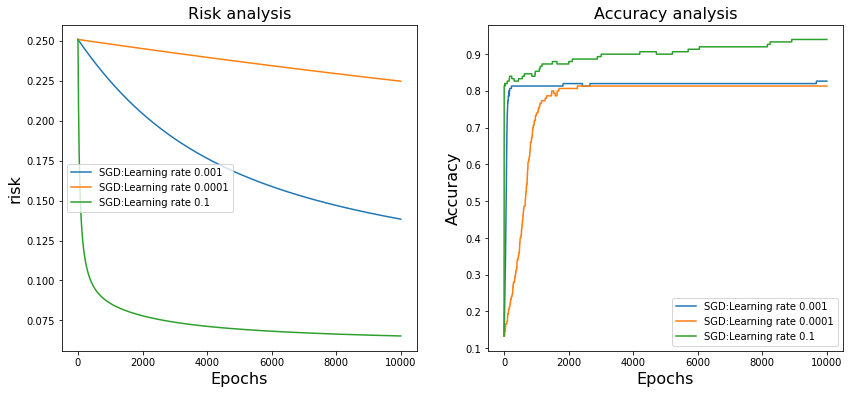

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
# Plot the loss vs Epochs
#


ax[0].plot(epochs, dict1["SGD:Learning rate 0.001"], label='SGD:Learning rate 0.001')
ax[0].plot(epochs, dict1["SGD:Learning rate 0.0001"], label='SGD:Learning rate 0.0001')
ax[0].plot(epochs, dict1["SGD:Learning rate 0.1"], label='SGD:Learning rate 0.1')
ax[0].set_title('Risk analysis', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('risk', fontsize=16)
ax[0].legend()
#
# Plot the model accuracy vs Epochs
#
ax[1].plot(epochs, dict2["SGD:Learning rate 0.001"], label='SGD:Learning rate 0.001')
ax[1].plot(epochs, dict2["SGD:Learning rate 0.0001"], label='SGD:Learning rate 0.0001')
ax[1].plot(epochs, dict2["SGD:Learning rate 0.1"], label='SGD:Learning rate 0.1')
ax[1].set_title('Accuracy analysis', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Accuracy', fontsize=16)
ax[1].legend()



In [ ]:
import matplotlib.pyplot as plt
risk_list=[]
risk1=[]
risk2=[]
risk3=[]
epochs=range(0,10000)
accuracy_list=[]
a1=[]
a2=[]
a3=[]
#define starting value of weights W for gradient descent
init_std_dev = 0.01;
initialW=init_std_dev*np.random.randn(n_features,n_classes)

# create a PyTorch tensor variable for W and b. 
# we will be optimizing over W, b, finding their best value using gradient descent, so we need gradient enabled
W = torch.tensor(initialW,requires_grad=True,device=device);
b = torch.zeros((1,n_classes),requires_grad=True,device=device);
############################################################################
# this optimizer will do gradient descent for us
learning_rate = 0.001;
#optimizer = torch.optim.SGD([W,b],lr=learning_rate)
optimizer = torch.optim.Adam([W,b],lr=learning_rate)

n_epochs = 10000;
for i in range(n_epochs):
    # clear previous gradient calculations
    optimizer.zero_grad();
    
    # calculate model predictions
    linear_predictions = torch.matmul(t_x_train,W)+b
    activations = 1.0 / (1.0 + torch.exp(-linear_predictions));
    
    #calculate loss
    prediction_error = t_y_train-activations
    risk = (torch.mean(torch.pow(prediction_error,2)));

    #calculate gradients of risk w.r.t. W,b and propagate them back
    risk.backward();

    # use the gradient to change W, b
    optimizer.step();

    # calculate accuracy (on the training set!)
    true_class = np.argmax(t_y_train.detach().cpu().numpy(),axis=1)
    pred_class = np.argmax(activations.detach().cpu().numpy(),axis=1)
    accuracy = np.count_nonzero(true_class == pred_class)/pred_class.shape[0];
    error = 1.0 - accuracy;
    risk1.append(risk.item())
    a1.append(accuracy)

risk_list.append(risk1)
accuracy_list.append(a1)

######################################################################################
W = torch.tensor(initialW,requires_grad=True,device=device);
b = torch.zeros((1,n_classes),requires_grad=True,device=device);
# this optimizer will do gradient descent for us
learning_rate = 0.0001;
#optimizer = torch.optim.SGD([W,b],lr=learning_rate)
optimizer = torch.optim.Adam([W,b],lr=learning_rate)

n_epochs = 10000;
for i in range(n_epochs):
    # clear previous gradient calculations
    optimizer.zero_grad();
    
    # calculate model predictions
    linear_predictions = torch.matmul(t_x_train,W)+b
    activations = 1.0 / (1.0 + torch.exp(-linear_predictions));
    
    #calculate loss
    prediction_error = t_y_train-activations
    risk = (torch.mean(torch.pow(prediction_error,2)));

    #calculate gradients of risk w.r.t. W,b and propagate them back
    risk.backward();

    # use the gradient to change W, b
    optimizer.step();

    # calculate accuracy (on the training set!)
    true_class = np.argmax(t_y_train.detach().cpu().numpy(),axis=1)
    pred_class = np.argmax(activations.detach().cpu().numpy(),axis=1)
    accuracy = np.count_nonzero(true_class == pred_class)/pred_class.shape[0];
    error = 1.0 - accuracy;
    risk2.append(risk.item())
    a2.append(accuracy)

risk_list.append(risk2)
accuracy_list.append(a2)
#######################################################################################3
W = torch.tensor(initialW,requires_grad=True,device=device);
b = torch.zeros((1,n_classes),requires_grad=True,device=device);
# this optimizer will do gradient descent for us
learning_rate = 0.1;
#optimizer = torch.optim.SGD([W,b],lr=learning_rate)
optimizer = torch.optim.Adam([W,b],lr=learning_rate)

n_epochs = 10000;
for i in range(n_epochs):
    # clear previous gradient calculations
    optimizer.zero_grad();
    
    # calculate model predictions
    linear_predictions = torch.matmul(t_x_train,W)+b
    activations = 1.0 / (1.0 + torch.exp(-linear_predictions));
    
    #calculate loss
    prediction_error = t_y_train-activations
    risk = (torch.mean(torch.pow(prediction_error,2)));

    #calculate gradients of risk w.r.t. W,b and propagate them back
    risk.backward();

    # use the gradient to change W, b
    optimizer.step();

    # calculate accuracy (on the training set!)
    true_class = np.argmax(t_y_train.detach().cpu().numpy(),axis=1)
    pred_class = np.argmax(activations.detach().cpu().numpy(),axis=1)
    accuracy = np.count_nonzero(true_class == pred_class)/pred_class.shape[0];
    error = 1.0 - accuracy;
    risk3.append(risk.item())
    a3.append(accuracy)

risk_list.append(risk3)
accuracy_list.append(a3)



In [ ]:
dict1={}
dict2={}
dict1["ADM:Learning rate 0.001"]=risk_list[0]
dict1["ADM:Learning rate 0.0001"]=risk_list[1]
dict1["ADM:Learning rate 0.1"]=risk_list[2]

dict2["ADM:Learning rate 0.001"]=accuracy_list[0]
dict2["ADM:Learning rate 0.0001"]=accuracy_list[1]
dict2["ADM:Learning rate 0.1"]=accuracy_list[2]

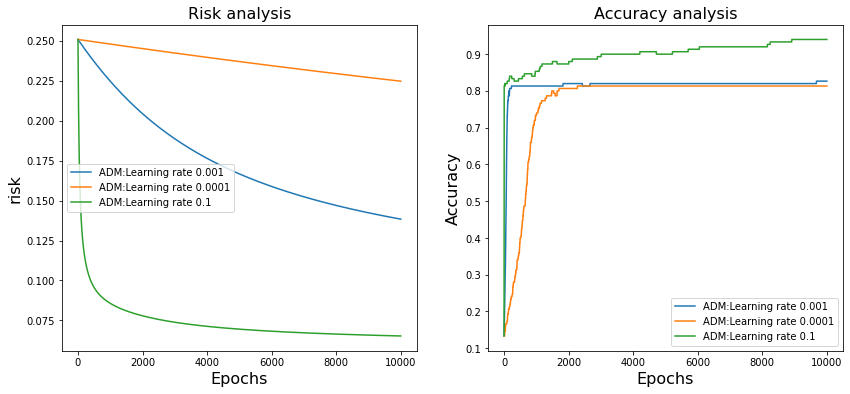

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
# Plot the loss vs Epochs
#


ax[0].plot(epochs, dict1["ADM:Learning rate 0.001"], label='ADM:Learning rate 0.001')
ax[0].plot(epochs, dict1["ADM:Learning rate 0.0001"], label='ADM:Learning rate 0.0001')
ax[0].plot(epochs, dict1["ADM:Learning rate 0.1"], label='ADM:Learning rate 0.1')
ax[0].set_title('Risk analysis', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('risk', fontsize=16)
ax[0].legend()
#
# Plot the model accuracy vs Epochs
#
ax[1].plot(epochs, dict2["ADM:Learning rate 0.001"], label='ADM:Learning rate 0.001')
ax[1].plot(epochs, dict2["ADM:Learning rate 0.0001"], label='ADM:Learning rate 0.0001')
ax[1].plot(epochs, dict2["ADM:Learning rate 0.1"], label='ADM:Learning rate 0.1')
ax[1].set_title('Accuracy analysis', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Accuracy', fontsize=16)
ax[1].legend()

